<a href="https://colab.research.google.com/github/JayrajRadadiya/Healthcare-analytics/blob/main/ABC_for_Class(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ABC Analysis

In [ ]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import io
from google.colab import files
uploaded = files.upload()

# Read the file
#data = pd.read_csv("abc.csv")

Saving individual_lab_abc.csv to individual_lab_abc (1).csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['individual_lab_abc.csv']))

In [ ]:
# Define the function for ABC Segmentation
def ABC_segmentation(perc):
   # Creates the 3 classes A, B, and C based on cost percentages (A-65%, B-20%, C-15%)
 
    if perc > 0 and perc < 0.65:
        return 'A'
    elif perc >= 0.65 and perc < 0.85:
        return 'B'
    elif perc >= 0.85:
        return 'C'

In [ ]:
# Run the head function
data.head()

,Item#,Item_name,usage,Unit_cost
0,1,Vanila almond milk,4.0,14.99
1,2,OG Kefir,1.0,14.99
2,3,Chicken Breast,3.0,16.99
3,4,Ground Beef,4.0,18.99
4,5,Bagel Wheat 6PK,2.0,14.99


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Item#      36 non-null     int64  
 1   Item_name  36 non-null     object 
 2    usage     36 non-null     float64
 3   Unit_cost  36 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.2+ KB


In [ ]:
data['revenue']=data[' usage ']*data['Unit_cost']

In [ ]:
# order by the field of interest
data= data.sort_values(by=['revenue'], ascending= False)
data.head()


,Item#,Item_name,usage,Unit_cost,revenue
5,6,Beef round stew meat,4.0,22.99,91.96
3,4,Ground Beef,4.0,18.99,75.96
6,7,Organic eggs,4.0,15.99,63.96
34,35,Supreme Pizza,3.0,19.99,59.97
0,1,Vanila almond milk,4.0,14.99,59.96


In [ ]:
# Calculate total sum of Consumption
Total_Sum = data['revenue'].sum()
print(Total_Sum)

1182.4560000000001


In [ ]:
# create the column of the running Cumulative Revenue per SKU, use  the cumsum() function
data['RunCumRev'] = data['revenue'].cumsum()
data.head()

,Item#,Item_name,usage,Unit_cost,revenue,RunCumRev
5,6,Beef round stew meat,4.0,22.99,91.96,91.96
3,4,Ground Beef,4.0,18.99,75.96,167.92
6,7,Organic eggs,4.0,15.99,63.96,231.88
34,35,Supreme Pizza,3.0,19.99,59.97,291.85
0,1,Vanila almond milk,4.0,14.99,59.96,351.81


In [ ]:
# create the column of the running percentage
data['RunPerc'] =  data['RunCumRev']/Total_Sum
data.head()

,Item#,Item_name,usage,Unit_cost,revenue,RunCumRev,RunPerc
5,6,Beef round stew meat,4.0,22.99,91.96,91.96,0.077770
3,4,Ground Beef,4.0,18.99,75.96,167.92,0.142010
6,7,Organic eggs,4.0,15.99,63.96,231.88,0.196100
34,35,Supreme Pizza,3.0,19.99,59.97,291.85,0.246817
0,1,Vanila almond milk,4.0,14.99,59.96,351.81,0.297525


In [ ]:
# Calculate total sum of additive cost
Total_Sum = data['revenue'].sum()
print(Total_Sum)


1182.4560000000001


In [ ]:
# create the column of the class by using the user defined function
data['Class'] = data['RunPerc'].apply(ABC_segmentation)
data.head()


,Item#,Item_name,usage,Unit_cost,revenue,RunCumRev,RunPerc,Class
5,6,Beef round stew meat,4.0,22.99,91.96,91.96,0.077770,A
3,4,Ground Beef,4.0,18.99,75.96,167.92,0.142010,A
6,7,Organic eggs,4.0,15.99,63.96,231.88,0.196100,A
34,35,Supreme Pizza,3.0,19.99,59.97,291.85,0.246817,A
0,1,Vanila almond milk,4.0,14.99,59.96,351.81,0.297525,A


In [ ]:
# Show the numbers in each class
data.Class.value_counts()

A    13
C    13
B    10
Name: Class, dtype: int64

In [ ]:
# Calculate and print total revenue per class

print ('Revenue of Class A :', round(data[data.Class == 'A']['revenue'].sum(), 2))
print ('Revenue of Class B :', round(data[data.Class == 'B']['revenue'].sum(), 2))
print ('Revenue of Class C :', round(data[data.Class == 'C']['revenue'].sum(), 2))


Revenue of Class A : 737.62
Revenue of Class B : 263.31
Revenue of Class C : 181.52


In [ ]:
# Calculate and print the percent of cost per class
print ('Percent of Revenue of Class A :', round(data[data.Class == 'A']['revenue'].sum()/data['revenue'].sum()*100,2))
print ('Percent of Revenue of Class B :', round(data[data.Class == 'B']['revenue'].sum()/data['revenue'].sum()*100, 2))
print ('Percent of Revenue of Class C :', round(data[data.Class == 'C']['revenue'].sum()/data['revenue'].sum()*100, 2))


Percent of Revenue of Class A : 62.38
Percent of Revenue of Class B : 22.27
Percent of Revenue of Class C : 15.35


In [ ]:
# Calculate and print the percent of quantity per class
print ('Percent of Cost of Class A :', round(data[data.Class == 'A']['Class'].count()/data['Class'].count()*100, 2))
print ('Percent of Cost of Class B :', round(data[data.Class == 'B']['Class'].count()/data['Class'].count()*100, 2))
print ('Percent of Cost of Class C :', round(data[data.Class == 'C']['Class'].count()/data['Class'].count()*100, 2))


Percent of Cost of Class A : 36.11
Percent of Cost of Class B : 27.78
Percent of Cost of Class C : 36.11


In [ ]:
y_pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

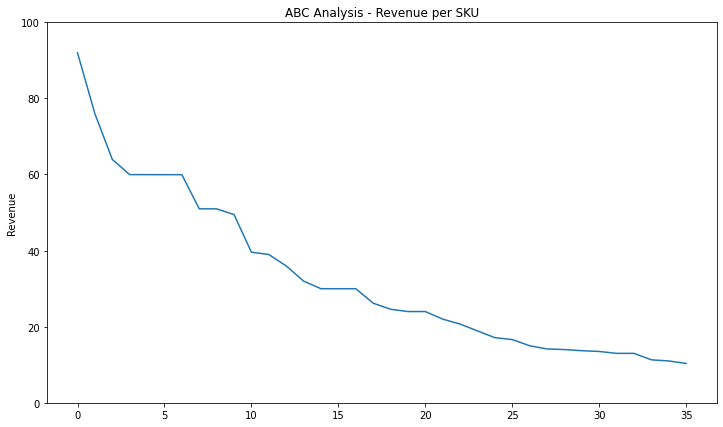

In [ ]:
# Convert the Cost column to a list
visual = data['revenue'].tolist()
y_pos = np.arange(len(visual))

plt.figure(figsize=(12,7))
plt.plot(y_pos, visual)
plt.ylabel('Revenue')
plt.title('ABC Analysis - Revenue per SKU')
plt.grid(False)
plt.ylim((0,100))

plt.show()

# Plot that list, Provide proper headings to the plot


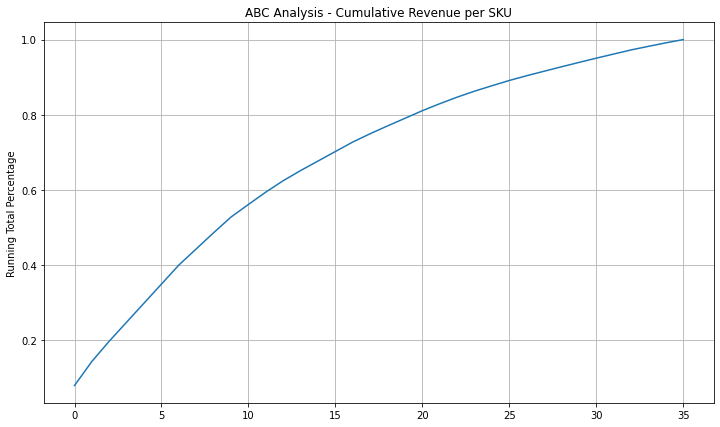

In [ ]:
# Convert the running percentage column to a list
visual = data['RunPerc'].tolist()
y_pos = np.arange(len(visual))

plt.figure(figsize=(12,7))
plt.plot(y_pos, visual)
plt.ylabel('Running Total Percentage')
plt.title('ABC Analysis - Cumulative Revenue per SKU')
plt.grid(True)
plt.show()


# Plot that list, Provide proper headings to the plot